<a href="https://colab.research.google.com/github/aaryangrg/DL/blob/master/Exercise-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [12]:
import sklearn
from sklearn.model_selection import train_test_split
X,y = sklearn.datasets.make_moons(1000,  shuffle = True, noise =0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train)
X_train = torch.from_numpy(X_train).to(device)
X_test = torch.from_numpy(X_test).to(device)
y_train = torch.from_numpy(y_train).to(device)
y_test = torch.from_numpy(y_test).to(device)

In [10]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 8)
    self.layer_2 = nn.Linear(in_features = 8, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()
  
  def forward(self, X):
    out1 = self.layer_1(X)
    out2 = self.layer_2(self.relu(out1))
    out3 = self.layer_3(self.relu(out2))
    return out3

model = Classifier()

In [11]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.05)



In [24]:
from torchmetrics.classification.accuracy import Accuracy
epochs = 2000

X_train = X_train.type(torch.float32)
X_test = X_test.type(torch.float32)
y_train = y_train.type(torch.float32)
y_test = y_test.type(torch.float32)
for epoch in range(epochs):
  model.train()
  y_logits = model(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  accuracy_metrics = Accuracy(task ="binary")
  accuracy_score = accuracy_metrics(y_preds, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  if epoch % 100 == 0 :
    test_logits = model(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    loss = loss_fn(test_logits, y_test)
    accuracy_metrics = Accuracy(task ="binary")
    accuracy_score = accuracy_metrics(test_preds, y_test)
    print("Accuracy : " , accuracy_score , "\t Loss :",loss)


Accuracy :  tensor(0.8700) 	 Loss : tensor(0.2687, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Accuracy :  tensor(0.8700) 	 Loss : tensor(0.2638, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Accuracy :  tensor(0.8750) 	 Loss : tensor(0.2580, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Accuracy :  tensor(0.8800) 	 Loss : tensor(0.2510, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Accuracy :  tensor(0.8800) 	 Loss : tensor(0.2432, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Accuracy :  tensor(0.8900) 	 Loss : tensor(0.2342, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Accuracy :  tensor(0.8950) 	 Loss : tensor(0.2238, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Accuracy :  tensor(0.9000) 	 Loss : tensor(0.2120, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Accuracy :  tensor(0.9100) 	 Loss : tensor(0.1985, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Accuracy :  tensor(0.9150) 	 Loss : tensor(0.1837, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


In [25]:
import numpy as np

def plot_decision_boundary(model, X, y):
  
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary
    
    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

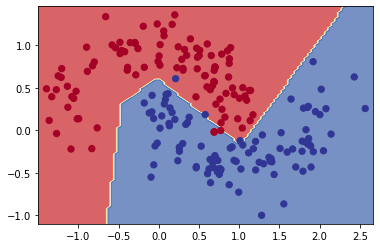

In [26]:
plot_decision_boundary(model, X_test, y_test)

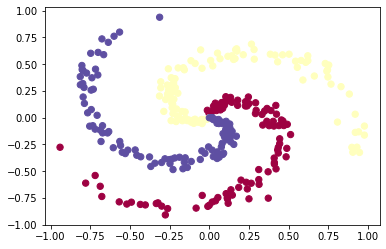

In [27]:
#Multiclass Classification Dataset
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=42)
X_train = torch.from_numpy(X_train).type(torch.float).to(device)
X_test = torch.from_numpy(X_test).type(torch.float).to(device)
y_train = torch.from_numpy(y_train).type(torch.float).to(device)
y_test = torch.from_numpy(y_test).type(torch.float).to(device)
X_train.shape

torch.Size([240, 2])

In [34]:
class SpiralClassifier(nn.Module) :
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 6)
    self.layer_2 = nn.Linear(in_features = 6, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()
  
  def forward(self, X):
    out1 = self.layer_1(X)
    out2 = self.layer_2(self.relu(out1))
    out3 = self.layer_3(self.relu(out2))
    return out3

model = SpiralClassifier()


In [48]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.05)

In [60]:
from torchmetrics.classification.accuracy import Accuracy
epochs = 2000

X_train = X_train.type(torch.float32)
X_test = X_test.type(torch.float32)
y_train = y_train.type(torch.float32)
y_test = y_test.type(torch.float32)
m = nn.Softmax(dim = 1)
for epoch in range(epochs):
  model.train()
  y_logits = model(X_train)
  y_preds = m(y_logits).argmax(dim=1)
  loss = loss_fn(y_logits.type(torch.float), y_train.type(torch.float))
  accuracy_metrics = Accuracy(task ="multiclass", num_classes = 3)
  accuracy_score = accuracy_metrics(y_preds, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  if epoch % 100 == 0 :
    test_logits = model(X_test)
    test_preds = m(test_logits).argmax(dim = 1)
    loss = loss_fn(test_logits, y_test)
    accuracy_metrics = Accuracy(task ="multiclass", num_classes = 3)
    accuracy_score = accuracy_metrics(test_preds, y_test)
    print("Accuracy : " , accuracy_score , "\t Loss :",loss)

RuntimeError: ignored

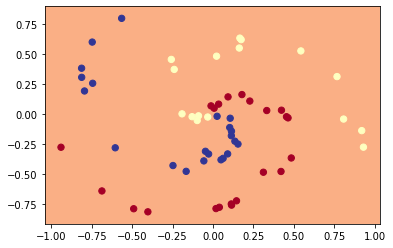

In [50]:
plot_decision_boundary(model,X_test,y_test)